<a href="https://colab.research.google.com/github/viktoruebelhart/cataract/blob/main/cataract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Automated Cataract Classification (Immature and Mature) Using Supervised Learning

This project aims to develop a predictive model to classify cataracts into two categories: immature and mature. Using supervised learning, the model will be trained on a database of images of eyes with cataracts, focused on differentiating these two stages of the disease. The system interface will allow users to upload a photo of the eye, and the model will return an accurate classification indicating whether the cataract is in the immature or mature stage.

Technologies:

- Python

- TensorFlow / Keras

- Image Processing

- Supervised Learning

Objective:
The project aims to provide a reliable tool that facilitates the classification of cataracts in the immature and mature stages, helping ophthalmologists quickly identify the condition and guide appropriate treatment.

importing data

link download: https://cdn3.gnarususercontent.com.br/3773-tensorflow-keras-imagens-redes-convolucionais/Projeto/catarata.zip

In [3]:
url = '/content/drive/MyDrive/Alura/catarata'

In [4]:
import pathlib

In [5]:
data_dir = pathlib.Path(url)

In [6]:
len(list(data_dir.glob('*/*.jpg')))

410

In [7]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['immature', 'mature']

In [8]:
import PIL

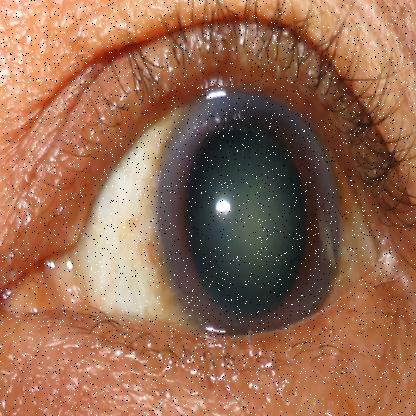

In [9]:
immature = list(data_dir.glob('immature/*'))
PIL.Image.open(str(immature[2]))

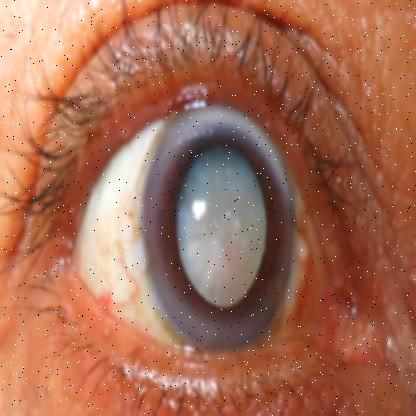

In [10]:
mature = list(data_dir.glob('mature/*'))
PIL.Image.open(str(mature[0]))

In [11]:
import numpy as np

In [12]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.jpg'))
  print(f'Class {subfolder} found {len(images)} images')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f"Dimension '{subfolder}': {img_array.shape}")

Class immature found 214 images
Dimension 'immature': (416, 416, 3)
Class mature found 196 images
Dimension 'mature': (416, 416, 3)


Because there are approximately 200 images in each of the folders, the first image always has dimensions 416, 416, 3. The first two numbers, here 416 by 416, are the pixel dimensions of the images. The image is 416 pixels wide by 416 pixels tall. And the third number is the number of channels in the image.

The image is divided into 3 color channels, that is, it is as if it were a combination of 3 matrices.

In [13]:
import tensorflow as tf

Now we want to load the images, but we can't load them all at once. This is because we can exceed the amount of RAM available on our machine.

We will use passing, batch loading, or batches. So, let's set the batch_size to be equal to 64, for example. Now let's define other characteristics of the images, for example, the height, which will be equal to 416 and the width, which will be equal to 416.

In [14]:
batch_size = 64
img_height = 416
img_width = 416

We have 410 images in total. We will use 328 images to train our neural network. The rest, we will use for validation, to validate our neural network. We will validate the neural network later with data that we did not see during training. To see if she generalized the problem effectively.

In [15]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [16]:
validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


Now, we see that we have 82 images out of these 410 being used for validation. By doing this training and validation division, we already have some of the information from our dataset.

In [17]:
train.class_names

['immature', 'mature']

#building the model

In [ ]:
tf.random.set_seed(424242)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
modelo.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

If we are going to train the neural network using the default Google Colab settings, this training can take a long time, mainly depending on the number of epochs in which we are going to run this training. So let's configure Google Colab to use a GPU.

Configuring a hardware accelerator Let's click on “Edit > Notebook Settings” in the top menu and, in the modal, select the “GPU T4” option as hardware accelerator.

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 805ms/step - accuracy: 0.5242 - loss: 53.2641 - val_accuracy: 0.5610 - val_loss: 3.7248
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.5040 - loss: 10.1998 - val_accuracy: 0.5488 - val_loss: 12.0397
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.6217 - loss: 8.6606 - val_accuracy: 0.6463 - val_loss: 8.9262
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.7455 - loss: 4.7437 - val_accuracy: 0.8171 - val_loss: 4.1279
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.8219 - loss: 1.7198 - val_accuracy: 0.8049 - val_loss: 5.5506
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.8280 - loss: 2.3776 - val_accuracy: 0.8415 - val_loss: 3.1735
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.7889 - loss: 3.9800 - val_accuracy: 0.8659 - val_loss: 2.2853
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.8488 - loss: 2.8161 - val_accuracy: 0.9146 - val_lo

In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 519168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,453,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,385,861 (760.60 MB)

 Trainable params: 66,461,953 (253.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,923,908 (507.06 MB)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

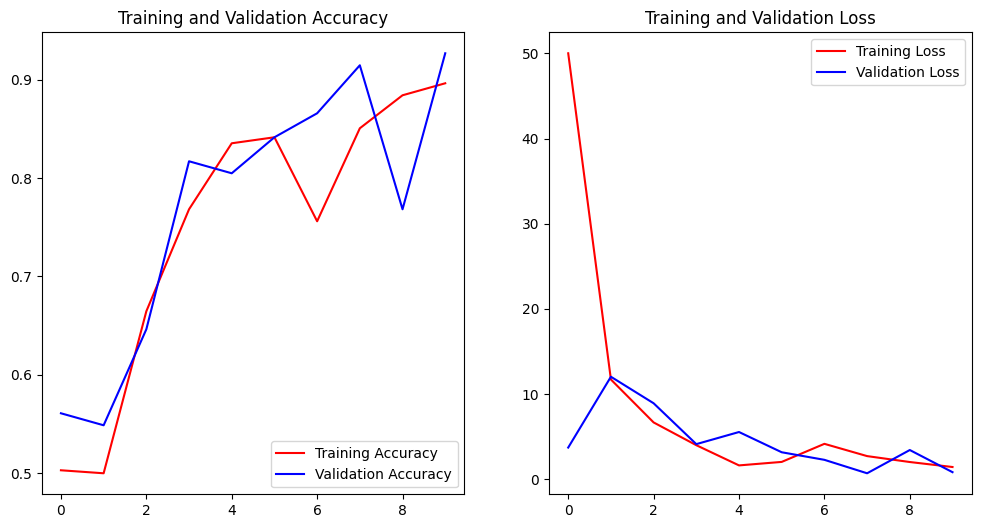

In [ ]:
plot_results(history, epochs)

The model is achieving high accuracy on the training set (94.8%) and also good accuracy on the validation set (92.68%). This indicates that the model can distinguish relatively well between immature and mature cataracts. However, the val_loss (0.6859) is significantly higher than the training loss (0.3443), which suggests that the model may be suffering from overfitting.

Adding Conv2D and MaxPooling2D layers to the model will allow for more robust and efficient feature extraction, helping the model learn better representations of images and improve its performance in classifying cataracts into immature and mature.

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

modelo.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4994 - loss: 5.7130 - val_accuracy: 0.5244 - val_loss: 1.6518
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.5716 - loss: 1.1833 - val_accuracy: 0.7439 - val_loss: 0.6211
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.7805 - loss: 0.5566 - val_accuracy: 0.7439 - val_loss: 0.4427
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.8558 - loss: 0.3448 - val_accuracy: 0.9024 - val_loss: 0.2656
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.9418 - loss: 0.1656 - val_accuracy: 0.9268 - val_loss: 0.2420
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.9511 - loss: 0.1333 - val_accuracy: 0.8780 - val_loss: 0.3900
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.9761 - loss: 0.1334 - val_accuracy: 0.8659 - val_loss: 0.3694
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.9987 - loss: 0.0576 - val_accuracy: 0.8780 - val_loss: 

In [ ]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

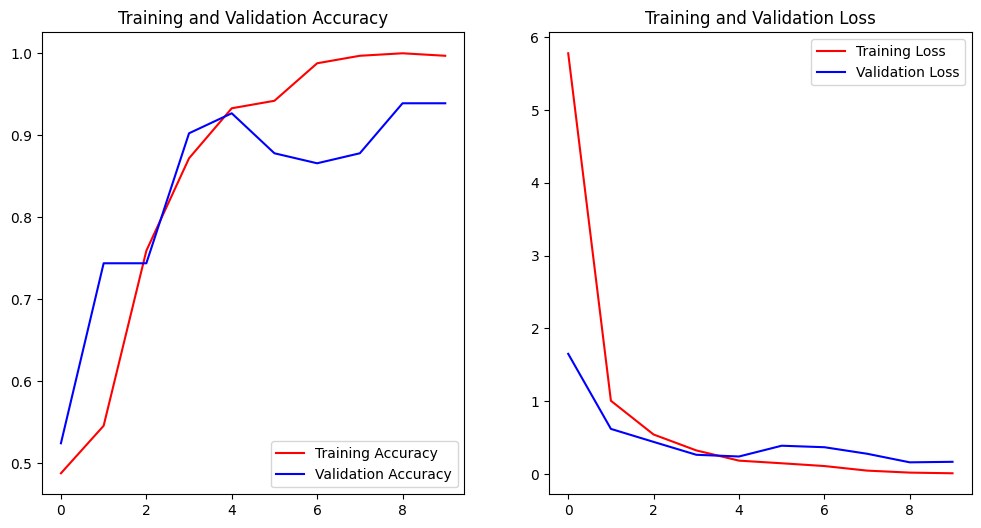

In [ ]:
plot_results(history, epochs)

The difference between the training loss (0.0352) and the validation loss (0.1523) is much smaller compared to the previous model, suggesting that the addition of the convolutional and pooling layers helped reduce overfitting. The model is now improving its generalization ability.

In [2]:
input_shape = (416, 416, 3)

Adding InceptionV3 to the model can significantly improve accuracy as it utilizes the powerful feature extraction capabilities of a pre-trained deep neural network

In [3]:
model_base = tf.keras.applications.InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

NameError: name 'tf' is not defined

In [25]:
model_base.trainable = False

In [ ]:
model_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 416, 416, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 207, 207, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 207, 207, 32)   │             96 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 207, 207, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 205, 205, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 205, 205, 32)   │             96 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 205, 205, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 205, 205, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 205, 205, 64)   │            192 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 205, 205, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 102, 102, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 102, 102, 80)   │            240 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 102, 102, 80)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 100, 100, 192)  │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 100, 100, 192)  │            576 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

Rescaling Images

This helps the model converge faster, as smaller values ​​make calculations easier and avoid problems with large weights during training.

In [26]:
rescale = tf.keras.layers.Rescaling((1./255))
train = train.map(lambda x, y: (rescale(x), y))
validation = validation.map(lambda x, y: (rescale(x), y))

The idea here is not to use the entire InceptionV3 network, but only the features extracted by the 'mixed7' layer, which already brings a good amount of useful information from the image. From this output, new custom layers will be added.

In [1]:
last_layer = model_base.get_layer('mixed5')
print('last layer output shape:', last_layer.output.shape)
last_exiting = last_layer.output

NameError: name 'model_base' is not defined

Adding x = outputs

In [28]:
x = tf.keras.layers.Flatten()(last_exiting)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_cataract = tf.keras.models.Model(model_base.input, x)

In [29]:
model_cataract.compile(tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [30]:
model_cataract.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 416, 416, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 207, 207, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 207, 207, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 207, 207, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 205, 205, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 205, 205, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 205, 205, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 205, 205, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 205, 205, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 205, 205, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 102, 102, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 102, 102, 80)   │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 102, 102, 80)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 100, 100, 192)  │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 100, 100, 192)  │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 461,962,145 (1.72 GB)

 Trainable params: 452,986,881 (1.69 GB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
epochs = 10
history = model_cataract.fit(
    train,
    validation_data = validation,
    epochs = epochs,

)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.4939 - loss: 24.0968 - val_accuracy: 0.4756 - val_loss: 23.8256
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - accuracy: 0.6374 - loss: 13.4793 - val_accuracy: 0.6707 - val_loss: 7.6641
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 0.8779 - loss: 2.3355 - val_accuracy: 0.9512 - val_loss: 0.8925
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step - accuracy: 0.9598 - loss: 0.8248 - val_accuracy: 0.9878 - val_loss: 0.0815
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 620ms/step - accuracy: 1.0000 - loss: 1.7623e-06 - val_accuracy: 0.9512 - val_loss: 0.4376
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.9817 - loss: 0.1783 - val_accuracy: 0.9878 - val_loss: 0.0151
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 615ms/step - accuracy: 1.0000 - loss: 3.5003e-13 - val_accuracy: 1.0000 - val_loss: 5.8405e-07
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 539ms/step - accuracy: 1.0000 - loss: 4.8862e-04 - val_accuracy: 0

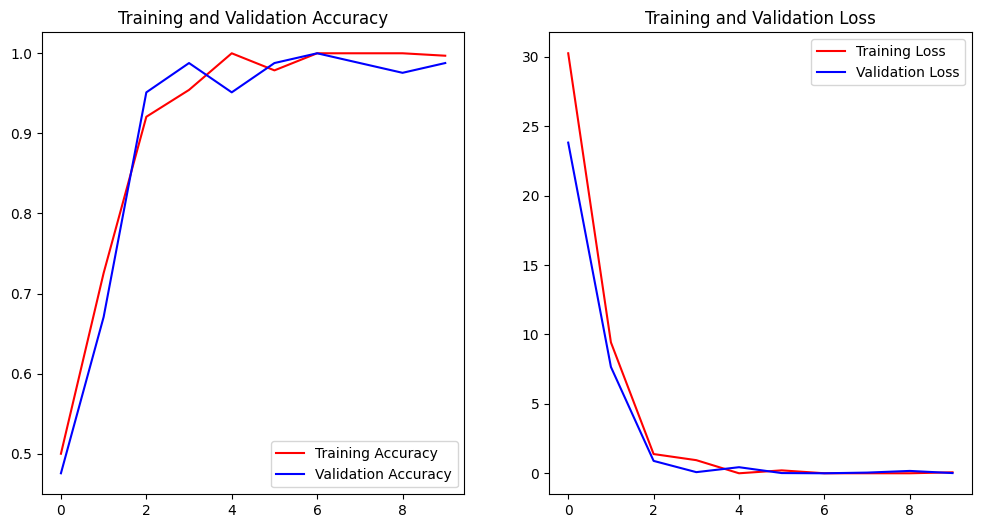

In [ ]:
plot_results(history, epochs)

-Training accuracy: 99.40%

-Training loss (loss): 0.1353

-Validation accuracy (val_accuracy): 98.78%

-Validation loss (val_loss): 0.0151

The model is now balanced, with high accuracy on both the training and validation sets, and the extremely low validation loss indicates that the model is predicting with high confidence. These changes have resulted in more robust and generalized performance.

saving the model

In [20]:
model_cataract.save('model_cataract.h5', include_optimizer = False)

NameError: name 'model_cataract' is not defined

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_cataract)

In [32]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [ ]:
model_tflite_cataract = converter.convert()

Saved artifact at '/tmp/tmpq13y_qkl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 416, 416, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132191403406816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403406640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403397488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403399424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403403824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403397664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403401360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191403408928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191425254800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132191425251456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13219142525444

In [ ]:
with open('model_16bits.tflite', 'wb') as f:
  f.write(model_tflite_cataract)

NameError: name 'model_tflite_cataract' is not defined